In [1]:
import pandas as pd

In [2]:
dataFrame = pd.read_csv("C:\\Users\\Shrutika\\Downloads\\50_Startups.csv")

In [3]:
import numpy as np
MEAN_PROFIT= np.mean(dataFrame.PROFIT)

In [4]:
NEW_PROFIT= []
for i in dataFrame.PROFIT:
    if(i<MEAN_PROFIT):
        NEW_PROFIT.append(0)
    else:
        NEW_PROFIT.append(1)

In [5]:
dataFrame['NEW_PROFIT'] = NEW_PROFIT

In [8]:
x = dataFrame[['ADMIN','MKT','ADMIN']]
y = dataFrame[['NEW_PROFIT']]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [7]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
ytest

,NEW_PROFIT
15,1
32,0
44,0
6,1
22,0
9,1
39,0
34,0
42,0
45,0


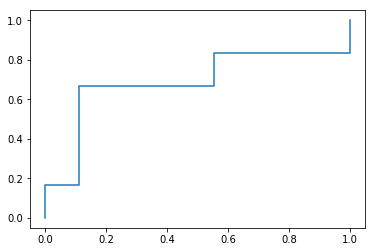

In [12]:
import sklearn.metrics as m

probs = lr.predict_proba(xtest)

preds = probs[:,1]

fpr, tpr, threshold = m.roc_curve(ytest, preds)
roc_auc = m.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, roc_auc)

In [13]:
roc_auc

0.6851851851851851